In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import eigh

# Cargar los datos
df = pd.read_csv('Data1_procesados/1.csv')

# Seleccionar solo los primeros 7 días
df_7days = df[df['Fecha'].isin(df['Fecha'].unique()[:7])]

# Análisis de Componentes Principales (PCA)
# Preparar los datos para PCA
X = df_7days[['period eating', 'period other', 'period resting', 'period rumination']].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_


In [31]:
df

,Fecha,Hora,period eating,period other,period resting,period rumination,period eating_count,period other_count,period resting_count,period rumination_count
0,2024-01-01,0,0.079,0.0,0.410,0.511,1.0,0.0,4.0,2.0
1,2024-01-01,1,0.000,0.0,0.652,0.348,0.0,0.0,1.0,1.0
2,2024-01-01,2,0.000,0.0,0.443,0.557,0.0,0.0,1.0,1.0
3,2024-01-01,3,0.000,0.0,0.462,0.538,0.0,0.0,2.0,2.0
4,2024-01-01,4,0.000,0.0,0.711,0.289,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
3931,2024-06-30,19,1.000,0.0,0.000,0.000,1.0,0.0,0.0,0.0
3932,2024-06-30,20,0.341,0.0,0.000,0.659,1.0,0.0,0.0,1.0
3933,2024-06-30,21,0.000,0.0,0.551,0.449,0.0,0.0,1.0,2.0
3934,2024-06-30,22,0.416,0.0,0.000,0.584,1.0,0.0,0.0,1.0


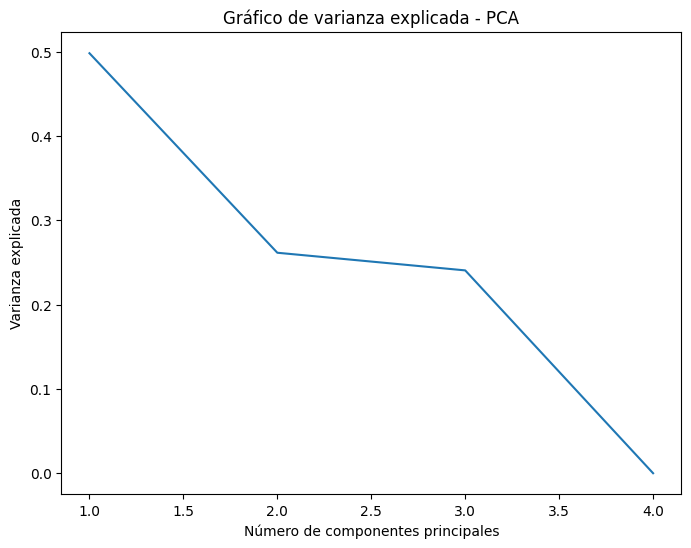

In [2]:
# Gráfico de varianza explicada
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada')
plt.title('Gráfico de varianza explicada - PCA')
plt.show()


In [28]:

# Extraer las columnas necesarias
hora = df_7days['Hora']
activity_counts = df_7days[['period eating_count', 'period other_count', 'period resting_count', 'period rumination_count']]

# Aplicar AFC
row_profiles = activity_counts.div(activity_counts.sum(axis=1), axis=0)
# Calcular los perfiles de columna
col_profiles = activity_counts.T.div(activity_counts.sum(axis=0), axis=1)

row_dist = pdist(row_profiles, 'euclidean')
col_dist = pdist(col_profiles, 'euclidean')

row_evals, row_evecs = eigh(squareform(row_dist))
col_evals, col_evecs = eigh(squareform(col_dist))

# Gráfico de correspondencia
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(row_evecs[:, 0], row_evecs[:, 1], label='Períodos')
ax.scatter(col_evecs[:, 0], col_evecs[:, 1], label='Actividades')

for i, label in enumerate(hora):
    ax.annotate(label, (row_evecs[i, 0], row_evecs[i, 1]))

for i, label in enumerate(activity_counts.columns):
    ax.annotate(label, (col_evecs[i, 0], col_evecs[i, 1]))

ax.set_xlabel('Dimensión 1')
ax.set_ylabel('Dimensión 2')
ax.set_title('Mapa perceptual - AFC')
ax.legend()
plt.show()


ValueError: array must not contain infs or NaNs

In [29]:
activity_counts

,period eating_count,period other_count,period resting_count,period rumination_count
0,1.0,0.0,4.0,2.0
1,0.0,0.0,1.0,1.0
2,0.0,0.0,1.0,1.0
3,0.0,0.0,2.0,2.0
4,0.0,0.0,1.0,1.0
...,...,...,...,...
163,0.0,1.0,1.0,1.0
164,1.0,0.0,2.0,1.0
165,1.0,0.0,1.0,1.0
166,1.0,0.0,2.0,2.0


In [27]:
row_profiles

,period eating_count,period other_count,period resting_count,period rumination_count
0,0.142857,0.000000,0.571429,0.285714
1,0.000000,0.000000,0.500000,0.500000
2,0.000000,0.000000,0.500000,0.500000
3,0.000000,0.000000,0.500000,0.500000
4,0.000000,0.000000,0.500000,0.500000
...,...,...,...,...
163,0.000000,0.333333,0.333333,0.333333
164,0.250000,0.000000,0.500000,0.250000
165,0.333333,0.000000,0.333333,0.333333
166,0.200000,0.000000,0.400000,0.400000


In [19]:
col_profiles

,0,1,2,3,4,5,6,7,8,9,...,162,163,164,165,166,167,period eating_count,period other_count,period resting_count,period rumination_count
period eating_count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
period other_count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
period resting_count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
period rumination_count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


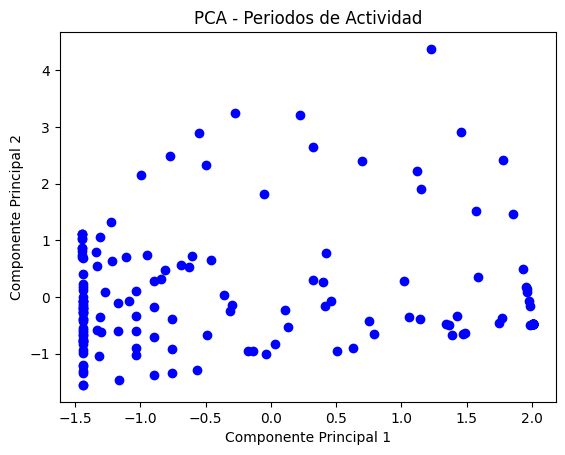

In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Estandarizar datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_7days[["period eating", "period other", "period resting", "period rumination"]])

# Aplicar PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(scaled_data)

# Graficar resultados
plt.scatter(pca_results[:, 0], pca_results[:, 1], c='blue')
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("PCA - Periodos de Actividad")
plt.show()


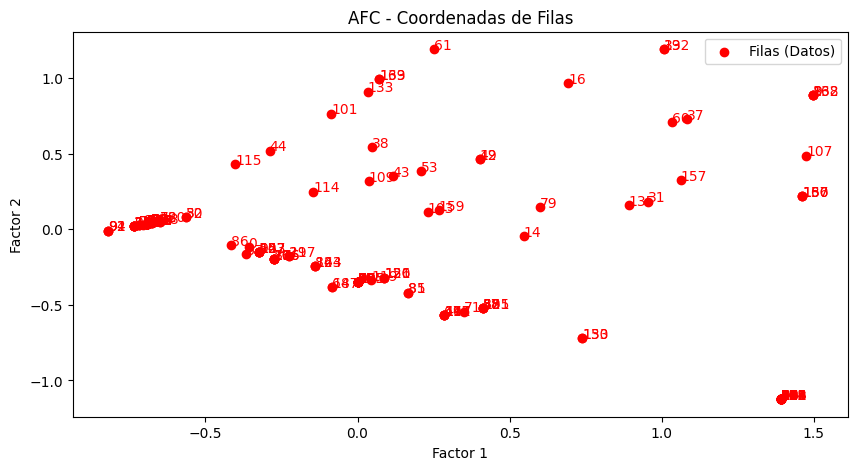

C:\Users\PC\AppData\Local\Temp\ipykernel_9516\3869812777.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (col_coords[0][i], col_coords[1][i]), color="green")


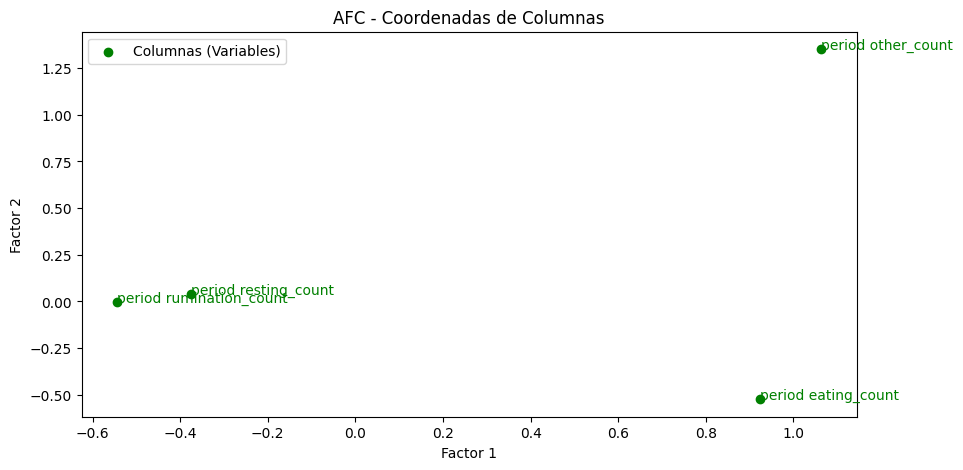

In [38]:
import matplotlib.pyplot as plt
import prince

# Seleccionar solo las columnas de conteo para AFC
count_data = df_7days[["period eating_count", "period other_count", "period resting_count", "period rumination_count"]]

# Aplicar AFC a las columnas de conteo
ca = prince.CA(n_components=2, n_iter=10)
ca = ca.fit(count_data)

# Obtener coordenadas de filas y columnas
row_coords = ca.row_coordinates(count_data)
col_coords = ca.column_coordinates(count_data)

# Graficar coordenadas de filas
plt.figure(figsize=(10, 5))
plt.scatter(row_coords[0], row_coords[1], color="red", label="Filas (Datos)")
for i, txt in enumerate(count_data.index):
    plt.annotate(txt, (row_coords[0][i], row_coords[1][i]), color="red")
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")
plt.title("AFC - Coordenadas de Filas")
plt.legend()
plt.show()

# Graficar coordenadas de columnas
plt.figure(figsize=(10, 5))
plt.scatter(col_coords[0], col_coords[1], color="green", label="Columnas (Variables)")
for i, txt in enumerate(count_data.columns):  # Ajustar a las columnas de conteo
    plt.annotate(txt, (col_coords[0][i], col_coords[1][i]), color="green")
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")
plt.title("AFC - Coordenadas de Columnas")
plt.legend()
plt.show()
